# SVM

In [18]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns

import pandas as pd
import numpy as np

In [19]:
kernel = "linear"
c = 1

In [68]:
df = pd.read_csv('../../dataset/cleaned_arguments_in_context_learning.csv')


In [67]:
df["label"].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [22]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [23]:
vector = TfidfVectorizer()

X = vector.fit_transform(df["text"])
y = df["label"].to_numpy()

# Convert labels to numbers
id2label = {i: label for i, label in enumerate(set(y))}
label2id = {label: i for i, label in id2label.items()}

y = np.array([label2id[label] for label in y])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KeyError: nan

In [ ]:
# SVM
svm = SVC(kernel=kernel, C=c, random_state=42)

svm.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [ ]:
y_pred = svm.predict(X_test)

y_pred = np.array(y_pred)
y_pred = y_pred.reshape(-1, 1)
print(accuracy(y_test, y_pred))

0.2503033106101738


<Axes: >

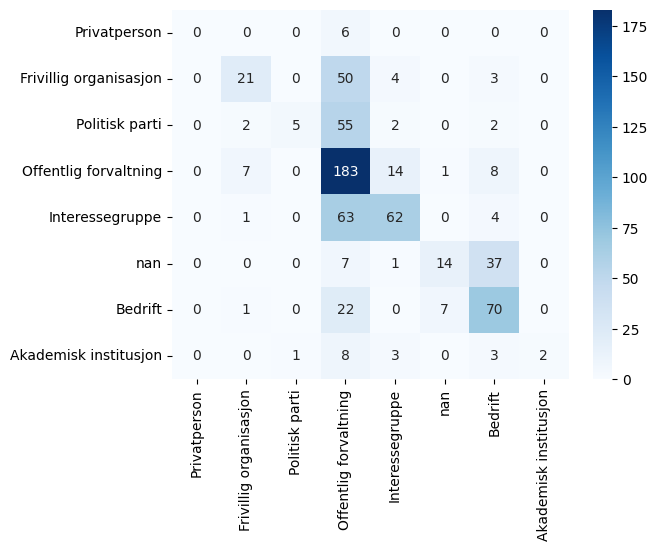

In [ ]:
# Convert ids to labels
def ids_to_labels(y, id2label):

    labels = [id2label[i] for i in np.array(y)]

    return labels

y_test = ids_to_labels(y_test, id2label)
# Flatten list
y_pred = y_pred.flatten()

y_pred = ids_to_labels(y_pred, id2label)

labels = list(id2label.values())

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

## SVM with count vectorizer

In [ ]:
vector = CountVectorizer()

X = vector.fit_transform(df["text"])
y = df["label"].to_numpy()

# Convert labels to numbers
id2label = {i: label for i, label in enumerate(set(y))}
label2id = {label: i for i, label in id2label.items()}

y = np.array([label2id[label] for label in y])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# SVM
svm = SVC(kernel=kernel, C=c, random_state=42)

svm.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [ ]:
y_pred = svm.predict(X_test)

y_pred = np.array(y_pred)
y_pred = y_pred.reshape(-1, 1)
print(accuracy(y_test, y_pred))

0.19989007085067734


<Axes: >

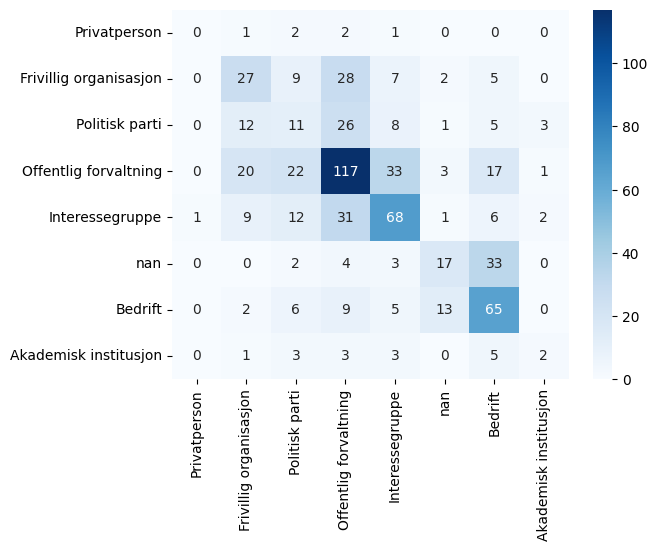

In [ ]:
# Convert ids to labels
def ids_to_labels(y, id2label):

    labels = [id2label[i] for i in np.array(y)]

    return labels

y_test = ids_to_labels(y_test, id2label)
# Flatten list
y_pred = y_pred.flatten()

y_pred = ids_to_labels(y_pred, id2label)

labels = list(id2label.values())

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

## SVM with word2vec

In [69]:
import spacy
from gensim.models import Word2Vec
from gensim.models import Doc2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [70]:
nlp = spacy.load('nb_core_news_md')

# Tokenize the text
def preprocess_text(text):
    
    doc = nlp(text.lower())
    tokens = [token.text for token in doc]
    return tokens

tokenized_docs = [preprocess_text(doc) for doc in df["text"]]

tagged_docs = [TaggedDocument(words=doc, tags=[str(i)]) for i, doc in enumerate(tokenized_docs)]

model = Doc2Vec(vector_size=100, window=2, min_count=1, workers=4, epochs=40)
model.build_vocab(tagged_docs)
model.train(tagged_docs, total_examples=model.corpus_count, epochs=model.epochs)

KeyboardInterrupt: 

In [73]:
doc_vectors = [model.infer_vector(doc) for doc in tokenized_docs]

In [72]:


from math import isnan


X = np.array(doc_vectors)
y = df["label"].to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [3345, 3298]

In [ ]:
# SVM model

svm = SVC(kernel=kernel, C=c, random_state=42)

svm.fit(X_train, y_train)

ValueError: Input y contains NaN.

In [ ]:
y_pred = svm.predict(X_test)

y_pred = np.array(y_pred)
y_pred = y_pred.reshape(-1, 1)
print(accuracy(y_test, y_pred))

In [ ]:
# Convert ids to labels
def ids_to_labels(y, id2label):

    labels = [id2label[i] for i in np.array(y)]

    return labels

y_test = ids_to_labels(y_test, id2label)
# Flatten list
y_pred = y_pred.flatten()

y_pred = ids_to_labels(y_pred, id2label)

labels = list(id2label.values())

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)